Tutorial 9: Summary
===================

In this chapter, we have learnt that:

 1) **PyAutoLens** uses Cartesian `Grid2D`'s of $(y,x)$ coordinates to perform ray-tracing.
 2) These grids are combined with light and mass profiles to compute images, deflection angles and other quantities.
 3) Profiles are grouped together to make galaxies.
 4) Collections of galaxies (at the same redshift) form a plane.
 5) A `Tracer` can make an image-plane + source-plane strong lens system.
 6) The Universe's cosmology can be input into this `Tracer` to convert its units to kiloparsecs.
 7) The tracer's mage can be used to simulate strong lens `Imaging` like it was observed with a real telescope.
 8) This data can be fitted, so to as quantify how well a model strong lens system represents the observed image.

In this summary, we'll go over all the different Python objects introduced throughout this chapter and consider how
they come together as one.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


__Initial Setup__

The `dataset_path` specifies where we load the dataset from, which is the directory 
`autolens_workspace/dataset/imaging/no_lens_light/howtolens/`.

In [2]:
dataset_path = path.join("dataset", "imaging", "no_lens_light", "howtolens")

Below, we do all the steps we have learned this chapter, making profiles, galaxies, a tracer, fitting dat, etc. 

Note that in this tutorial, we omit the lens galaxy's light and include two light profiles in the source representing a
`bulge` and `disk`.

In [3]:
imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    pixel_scales=0.1,
)

mask = al.Mask2D.circular(
    shape_native=imaging.shape_native, pixel_scales=imaging.pixel_scales, radius=3.0
)

imaging = imaging.apply_mask(mask=mask)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, elliptical_comps=(0.17647, 0.0)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllSersic(
        centre=(0.1, 0.1),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=4.0,
    ),
    disk=al.lp.EllSersic(
        centre=(0.1, 0.1),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=1.0,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitImaging(imaging=imaging, tracer=tracer)

__Object Composition__

Lets now consider how all of the objects we've covered throughout this chapter (`LightProfile`'s, `MassProfile`'s,
`Galaxy`'s, `Plane`'s, `Tracer`'s) come together in a `FitImaging` object.

The fit contains the `Tracer`, which contains the `Planes`, which contains the `Galaxy`'s which contains 
the `Profile`'s:

In [4]:
print(fit)
print()
print(fit.tracer)
print()
print(fit.tracer.image_plane)
print()
print(fit.tracer.source_plane)
print()
print(fit.tracer.image_plane.galaxies[0])
print()
print(fit.tracer.source_plane.galaxies[0])
print()
print(fit.tracer.image_plane.galaxies[0].mass)
print()
print(fit.tracer.source_plane.galaxies[0].bulge)
print()
print(fit.tracer.source_plane.galaxies[0].disk)
print()





Redshift: 0.5
Mass Profiles:
EllIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.17647, 0.0)
axis_ratio: 0.700000850000425
angle: 45.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0

Redshift: 1.0
Light Profiles:
EllSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
angle: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 4.0
EllSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
angle: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0

EllIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.17647, 0.0)
axis_ratio: 0.700000850000425
angle: 45.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0

EllSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
angle: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 4.0

EllSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
angle: 0.0
intensity: 1.0
effective_radius: 1.0
s

Once we have a `FitImaging` object, we can therefore use any of the `Plotter` objects throughout this chapter to plot
any specific aspect of the fit, whether it be a profile, galaxy, plane or tracer. For example, if we want to plot the 
image of the source galaxy's bulge and disk, we can do this in a variety of different ways.

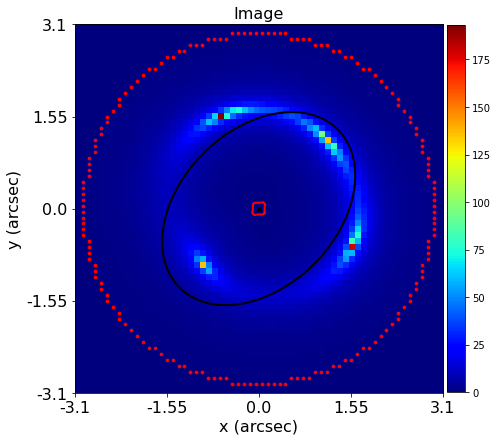

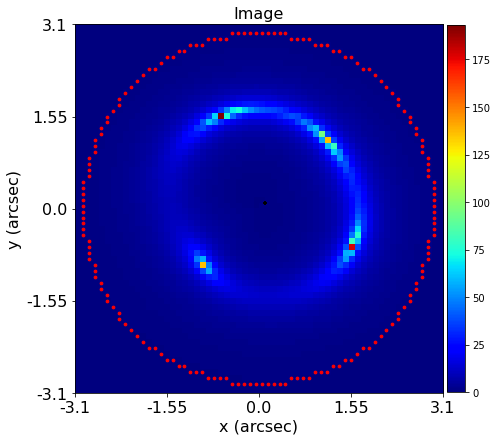

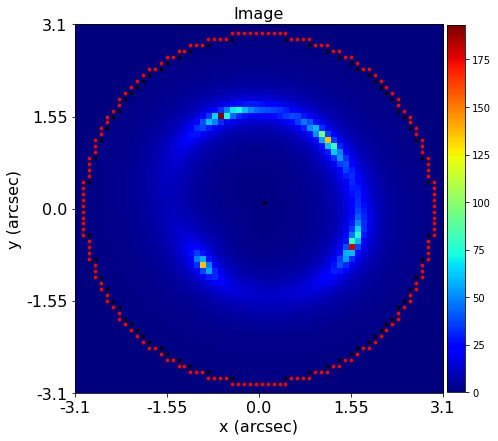

In [5]:
tracer_plotter = aplt.TracerPlotter(tracer=fit.tracer, grid=imaging.grid)
tracer_plotter.figures_2d(image=True)

source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=imaging.grid)[1]
plane_plotter = aplt.PlanePlotter(plane=tracer.source_plane, grid=source_plane_grid)
plane_plotter.figures_2d(image=True)

galaxy_plotter = aplt.GalaxyPlotter(
    galaxy=fit.tracer.source_plane.galaxies[0], grid=source_plane_grid
)
galaxy_plotter.figures_2d(image=True)

Understanding how these objects decompose into the different components of a strong lens is important for general 
**PyAutoLens** use.

As the strong lens systems that we analyse become more complex, it is useful to know how to decompose their light 
profiles, mass profiles, galaxies and planes to extract different pieces of information about the strong lens. For 
example, we made our source-galaxy above with two light profiles, a `bulge` and `disk`. We can plot the lensed image of 
each component individually, now that we know how to break-up the different components of the fit and tracer.

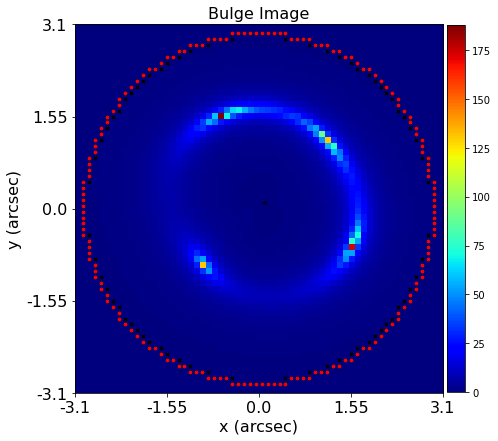

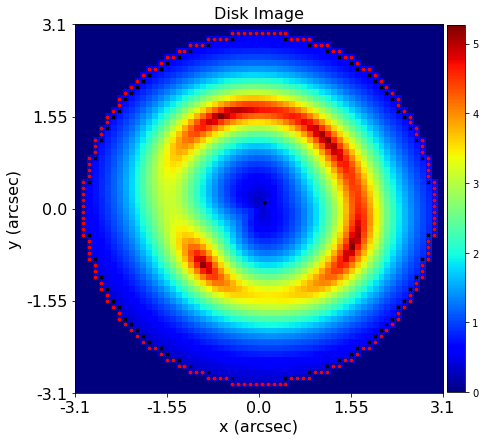

In [6]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=fit.tracer.source_plane.galaxies[0].bulge, grid=source_plane_grid
)
light_profile_plotter.set_title("Bulge Image")
light_profile_plotter.figures_2d(image=True)

light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=fit.tracer.source_plane.galaxies[0].disk, grid=source_plane_grid
)
light_profile_plotter.set_title("Disk Image")
light_profile_plotter.figures_2d(image=True)

__Visualization__

Furthermore, using the `MatPLot2D`, `Visuals2D` and `Include2D` objects visualize any aspect of a fit we're interested 
in and fully customize the figure. 

Before beginning chapter 2 of **HowToLens**, you should checkout the package `autolens_workspace/plot`. This provides a 
full API reference of every plotting option in **PyAutoLens**, allowing you to create your own fully customized 
figures of strong lenses with minimal effort!

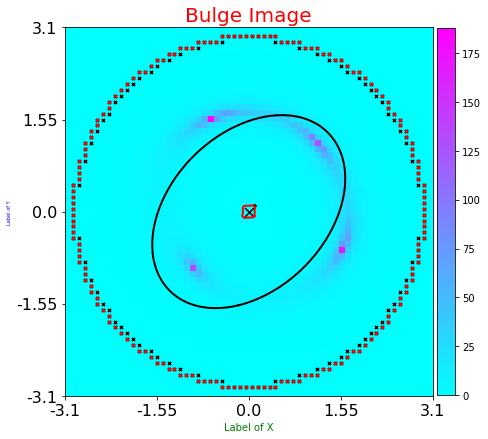

In [7]:
mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="This is the title", color="r", fontsize=20),
    ylabel=aplt.YLabel(label="Label of Y", color="b", fontsize=5, position=(0.2, 0.5)),
    xlabel=aplt.XLabel(label="Label of X", color="g", fontsize=10),
    cmap=aplt.Cmap(cmap="cool", norm="linear"),
)

include_2d = aplt.Include2D(
    origin=True, mask=True, border=True, light_profile_centres=True
)

visuals_2d = aplt.Visuals2D(
    critical_curves=tracer.critical_curves_from_grid(grid=fit.grid)
)

light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=fit.tracer.source_plane.galaxies[0].bulge,
    grid=source_plane_grid,
    mat_plot_2d=mat_plot_2d,
    include_2d=include_2d,
    visuals_2d=visuals_2d,
)
light_profile_plotter.set_title("Bulge Image")
light_profile_plotter.figures_2d(image=True)

And, we're done, not just with the tutorial, but the chapter!

__Code Design__

To end, I want to quickly talk about the **PyAutoLens** code-design and structure, which was really the main topic of
this tutorial.

Throughout this chapter, we never talk about anything like it was code. We didn`t refer to  'variables', 'parameters`' 
'functions' or 'dictionaries', did we? Instead, we talked about 'galaxies', 'planes' a 'Tracer', etc. We discussed 
the objects that we, as scientists, think about when we consider a strong lens system.

Software that abstracts the underlying code in this way follows an `object-oriented design`, and it is our hope 
with **PyAutoLens** that we've made its interface (often called the API for short) very intuitive, whether you were
previous familiar with gravitational lensing or a complete newcomer!

__Source Code__

If you do enjoy code, variables, functions, and parameters, you may want to dig deeper into the **PyAutoLens** source 
code at some point in the future. Firstly, you should note that all of the code we discuss throughout the **HowToLens** 
lectures is not contained in just one project (e.g. the **PyAutoLens** GitHub repository) but in fact four repositories:

**PyAutoFit** - Everything required for lens modeling (the topic of chapter 2): https://github.com/rhayes777/PyAutoFit

**PyAutoArray** - Handles all data structures and Astronomy dataset objects: https://github.com/Jammy2211/PyAutoArray

**PyAutoGalaxy** - Contains the light profiles, mass profiles and galaxies: https://github.com/Jammy2211/PyAutoGalaxy

**PyAutoLens** - Everything strong lensing: https://github.com/Jammy2211/PyAutoLens

Instructions on how to build these projects from source are provided here:

https://pyautolens.readthedocs.io/en/latest/installation/source.html

We take a lot of pride in our source code, so I can promise you its well written, well documented and thoroughly 
tested (check out the `test` directory if you're curious how to test code well!).

__Wrap Up__

You`ve learn a lot in this chapter, but what you have not learnt is how to 'model' a real strong gravitational lens.

In the real world, we have no idea what the 'correct' combination of light profiles, mass profiles and galaxies are 
that will give a good fit to a lens. Lens modeling is the process of finding the lens model which provides a good fit 
and it is the topic of chapter 2 of **HowToLens**.

Finally, if you enjoyed doing the **HowToLens** tutorials please git us a star on the **PyAutoLens** GitHub
repository: 

 https://github.com/Jammy2211/PyAutoLens

Even the smallest bit of exposure via a GitHub star can help our project grow and counts when it comes to winning
funding for future **PyAutoLens** development!